# 六、numpy的常用函数
---

### 1. 读取文件

- 逻辑上可被解释为二维数组的文本文件：
    - `数据项1<分隔符>数据项2<分隔符>...<分隔符>数据项n`
            numpy.loadtxt(
                文件路径,
                delimiter=分隔符(缺省一个空格),
                usecols=列序列(缺省所有列),
                unpack=是否展开列(缺省False),  # 返回一个二维数组(False)或多个一维数组(True)
      

          dtype=元素类型(缺省float),
                converters=转换器字典(缺省不做转换))

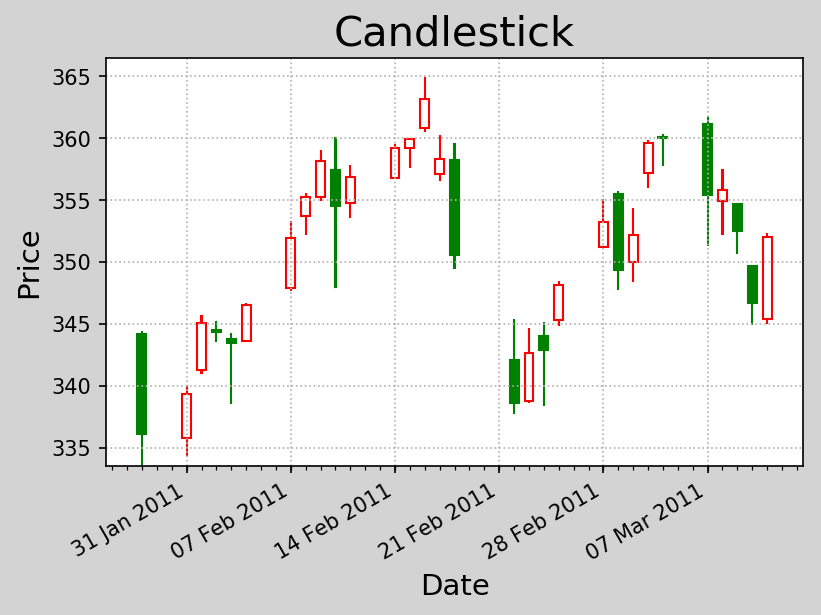

In [108]:
# k.py
import numpy as np
import datetime as dt
import matplotlib.pyplot as mp
import matplotlib.dates as md

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, opening_prices, highest_prices, lowest_prices, closing_prices \
= np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 3, 4, 5, 6), unpack=True, dtype='M8[D], f8, f8, f8, f8', \
            converters={1: dmy2ymd})

mp.figure('Candlestick', dpi=150, facecolor='lightgray')
mp.title('Candlestick', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Price', fontsize=14)
ax = mp.gca()
# 设置水平坐标每个星期一为主刻度
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
# 设置每一天为次刻度
ax.xaxis.set_minor_locator(md.DayLocator())
# 设置水平坐标主刻度标签格式
ax.xaxis.set_major_formatter(md.DateFormatter('%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

dates = dates.astype(md.datetime.datetime)

rise = closing_prices - opening_prices >= 0.01 # 阳线掩码，为bool数组
fall = opening_prices - closing_prices >= 0.01 # 阴险掩码
# 填充色
fc = np.zeros(dates.size, dtype='3f4')
fc[rise], fc[fall] = (1, 1, 1), (0, 0.5, 0)  # 设置红色和浅绿色
# 边缘色
ec = np.zeros(dates.size, dtype='3f4')
ec[rise], ec[fall] = (1, 0, 0), (0, 0.5, 0)  # 设置红色和浅绿色

mp.bar(dates, highest_prices - lowest_prices, 0.01, lowest_prices, color=fc, edgecolor=ec)
mp.bar(dates, closing_prices - opening_prices, 0.6, opening_prices, color=fc, edgecolor=ec)

# 自动调整水平坐标轴的日期标签
mp.gcf().autofmt_xdate()
mp.show()

### 2. 算数平均值
- 样本：`S = [s1, s2, ..., sn]`
- 算数平均值：`m = (s1+s2+...+sn) / n`
        测      误差
        s1 = s+d1
        s2 = s+d2
        ...
        sn = s+dn
        m =(s1+s2+...+sn) / n
          =(s+s+...+s) / n + (d1+d2+...+dn)/n
          =s + (d1+d2+...+dn)/n
          n->oo
- 算数平均值表示对真值的无偏估计。

`numpy.mean(S)->m`

In [46]:
# mean.py
import numpy as np
def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, opening_prices, highest_prices, lowest_prices, closing_prices \
= np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 3, 4, 5, 6), unpack=True, dtype='M8[D], f8, f8, f8, f8', \
            converters={1: dmy2ymd})

mean = 0
for cp in closing_prices:
    mean += cp
mean /= closing_prices.size
print(mean)

mean = np.mean(closing_prices)
print(mean)

351.03766666666667
351.0376666666667


### 3. 加权平均值
- 样本：`S = [s1, s2, ..., sn]`
- 权重：`W = [w1, w2, ..., wn]`
- 加权平均值：
        a = (s1w1+s2w2+...+snwn)/(w1+w2+...+wn)
        numpy.average(S, weights=W)->a
- VWAP - 成交量加权平均价格
- TWAP - 时间加权平均价格

In [48]:
# VWAP.py
import numpy as np

closing_prices, volumes = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(6, 7), unpack=True)

# 原始计算方法
vwap, wsum = 0, 0
for closing_price, volume in zip(closing_prices, volumes):
    vwap += closing_price * volume
    wsum += volume
vwap /= wsum
print(vwap)

vwap = np.average(closing_prices, weights=volumes)
print(vwap)

350.5895493532009
350.5895493532009


In [56]:
# TWAP.py
import numpy as np
import datetime as dt

def dmy2days(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    days = (date - dt.date.min).days
    return days

dates, closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 6), unpack=True, 
                                   converters={1:dmy2days})

twap = np.average(closing_prices, weights=dates)
print(twap)

351.0377051146597


### 4. 最值
- max/min：返回一个数组中最大/最小元素
- argmax/argmin：返回一个数组中最大/最小元素的下标
- maximum/minimum：将两个同维数组中对应位置元素中最大/最小元素构成一个新的数组
- ptp：返回一个数组中最大值和最小值之差

In [65]:
# max.py
import numpy as np
# 产生9个[10, 100)区间的随机数
a = np.random.randint(10, 100, 9).reshape(3, 3)
print(a)
print(np.max(a),np.min(a))
print(np.argmax(a), np.argmin(a))

b = np.random.randint(10, 100, 9).reshape(3, 3)
print(b)
print(np.maximum(a, b))
print(np.minimum(a, b))

print(np.ptp(a))

[[70 48 99]
 [85 78 99]
 [97 41 86]]
99 41
2 7
[[40 66 28]
 [34 11 90]
 [59 88 24]]
[[70 66 99]
 [85 78 99]
 [97 88 86]]
[[40 48 28]
 [34 11 90]
 [59 41 24]]
58


In [76]:
# range.py
import numpy as np
dates, highest_prices, lowest_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 4, 5), 
                                                  unpack=True, dtype='U10, f8, f8')
max_price = np.max(highest_prices)
min_price = np.min(lowest_prices)
print(min_price, 'to', max_price)

max_index = np.argmax(highest_prices)
min_index = np.argmin(lowest_prices)
print(dates[max_index], 'and', dates[min_index])

# 波动范围
r = highest_prices - lowest_prices
highest_ptp = np.ptp(highest_prices)
lowest_ptp = np.ptp(lowest_prices)
print(highest_ptp, 'and', lowest_ptp)

333.53 to 364.9
16-02-2011 and 28-01-2011
24.859999999999957 and 26.970000000000027


### 5. 中位数
- 将多个样本按照大小排序，取中间位置的元素。
- np.median(无序样本)->中位数
        10 20 30 40 50
              ^ (a[(5-1)/2]+a[5/2])/2
        10 20 30 40 50 60
              ^   ^
              (a[(6-1)/2]+a[6/2])/2

- `(a[(s-1)/2]+a[s/2])/2`

In [81]:
# med.py
import numpy as np
closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(6))

size = closing_prices.size
sorted_prices = np.msort(closing_prices)
median = (sorted_prices[int((size - 1)/ 2)] + sorted_prices[int(size / 2)]) / 2
print(median)

median = np.median(closing_prices)
print(median)

[336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
352.055
352.055


### 6. 标准差
- 样本：S = [s1, s2, ..., sn]
- 平均值：m = (s1+s2+...+sn)/n
- 离差：D = [d1, d2, ..., dn], di = si-m
- 离差方：Q = [q1, q2, ..., qn], qi = di^2
- 总体方差：v = (q1+q2+...+qn)/n
- 总体标准差：s = sqrt(v)，方均根


- 样本方差：v' = (q1+q2+...+qn)/(n-1)
    - ${s^2} = \frac{1}{{n - 1}}(\sum\limits_{n - 1}^n {({x_i} - \bar x){)^2}}$
    - `numpy.std(S)`    
- 样本标准差：s' = sqrt(v')，方均根
    - `numpy.std(S, ddof=1)`   
    - ${s^2} = \frac{1}{{n - 1}}\sqrt {(\sum\limits_{n - 1}^n {({x_i} - \bar x){)^2}} }$  

In [87]:
# var.py
import numpy as np
closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(6))

mean = np.mean(closing_prices) # 算术平均值
devs = closing_prices - mean # 离差
dsqs = devs ** 2 # 离差方
pvar = np.mean(dsqs) # 总体方差
pstd = np.sqrt(pvar) # 总体标准差

svar = np.sum(dsqs) / (dsqs.size - 1) # 样本方差
sstd = np.sqrt(svar) # 样本标准差
print(pstd, sstd)

pstd = np.std(closing_prices)
sstd = np.std(closing_prices, ddof=1)
print(pstd, sstd)

7.080008325481608 7.201042876260849
7.080008325481608 7.201042876260849


### 7. 时间数据处理
1. 按星期取平均值

In [95]:
# week.py
import numpy as np
import datetime as dt

# 转换器函数：日月年格式的字符串转换成星期
def dmy2wday(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    wday = date.weekday() # 用0到6表示周一到周日
    return wday




wdays, closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 6), unpack=True, 
                                   converters={1: dmy2wday})
print(wdays)

ave_closing_prices = np.zeros(5)
for wday in range(ave_closing_prices.size):
    '''
    ave_closing_prices[wday] = np.take(
        closing_prices, np.where(wdays == wday)).mean()
    '''
    '''
    ave_closing_prices[wday] = \
        closing_prices[np.where(wdays == wday)].mean()
    '''
    ave_closing_prices[wday] = \
        closing_prices[wdays == wday].mean()
for wday, ave_closing_price in zip(
        ['MON', 'TUE', 'WED', 'THU', 'FRI'],
        ave_closing_prices):
    print(wday, np.round(ave_closing_price, 2))

[4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 1. 2. 3. 4. 0. 1. 2. 3.
 4. 0. 1. 2. 3. 4.]
MON 351.79
TUE 350.64
WED 352.14
THU 350.9
FRI 350.02


2. 按星期汇总数据
    - 数组的轴向汇总
    - `np.apply_along_axis(处理函数, 轴向, 数组)`
    - 沿着数组中所指定的轴向，调用处理函数，并将每次调用的返回值重新组织成数组返回。

In [97]:
# axis.py
import numpy as np


def foo(arg):
    print('foo', arg)
    return arg.sum()

a = np.arange(1, 10).reshape(3, 3)
print(a)
b = np.apply_along_axis(foo, 0, a)
print(b)
c = np.apply_along_axis(foo, 1, a)
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
foo [1 4 7]
foo [2 5 8]
foo [3 6 9]
[12 15 18]
foo [1 2 3]
foo [4 5 6]
foo [7 8 9]
[ 6 15 24]


In [107]:
# sum.py
import numpy as np
import datetime as dt

def dmy2wday(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    wday = date.weekday()
    return wday


wdays, opening_prices, highest_prices, \
    lowest_prices, closing_prices = np.loadtxt(
        '../data/aapl.csv',
        delimiter=',', usecols=(1, 3, 4, 5, 6),
        unpack=True, converters={1: dmy2wday})

wdays = wdays[:16]
opening_prices = opening_prices[:16]
highest_prices = highest_prices[:16]
lowest_prices = lowest_prices[:16]
closing_prices = closing_prices[:16]

# 第一个星期一的索引
first_monday = np.where(wdays == 0)[0][0]
last_friday = np.where(wdays == 4)[0][-1]
indices = np.arange(first_monday, last_friday + 1)
indices = np.split(indices, 3)

def week_summary(indices):
    opening_price = opening_prices[indices[0]]
    highest_price = highest_prices[indices].max()
    lowest_price = lowest_prices[indices].min()
    closing_price = closing_prices[indices[-1]]
    return opening_price, highest_price, \
        lowest_price, closing_price

summaries = np.apply_along_axis(
    week_summary, 1, indices)
print(summaries)
np.savetxt('../data/summary.csv', summaries, delimiter=',', fmt='%g')

[[335.8  346.7  334.3  346.5 ]
 [347.89 360.   347.64 356.85]
 [356.79 364.9  349.52 350.56]]


### 8. 卷积
- 卷积积分
- 激励函数：$g(t)$
- 单位激励下的响应函数：$f(t)$
- 响应函数：$\int{g(t)f(t)dt}$

        a = [1 2 3 4 5]
        b = [6 7 8]
        c = numpy.convolve(a, b, 卷积类型)
        
                              40   61   82            - 有效卷积(valid)
                         19   40   61   82   67       - 同维卷积(same)
                    6    19   40   61   82   67   40  - 完全卷积(full) 
          0    0    1    2    3    4    5    0    0
          8    7    6
               8    7    6
                    8    7    6
                         8    7    6
                              8    7    6
                                   8    7    6
                                        8    7    6

In [115]:
# conv.py
import numpy as np
a = np.arange(1, 6) # 被卷积序列
b = np.arange(6, 9) # 卷积核序列
print(a, b)
c = np.convolve(a, b, 'full')
print(c)
d = np.convolve(a, b, 'same')
print(d)
e = np.convolve(a, b, 'valid')
print(e)

[1 2 3 4 5] [6 7 8]
[ 6 19 40 61 82 67 40]
[19 40 61 82 67]
[40 61 82]


### 9. 移动均线
    简单平均
    a b c d e f g h i j [1/5 1/5 1/5 1/5 1/5] 卷积核
    (a+b+c+d+e)/5
    (b+c+d+e+f)/5
    (c+d+e+f+g)/5
    ...
    (f+g+h+i+j)/5
    
    指数平均，加权平均
    [A, B, C, D, E]
    S=A+B+C+D+E
    (aA+bB+cC+dD+eE)/S
    aA/S+bB/S+cC/S+dD/S+eE/S
    [A/S, B/S, C/S, D/S, E/S] 卷积核

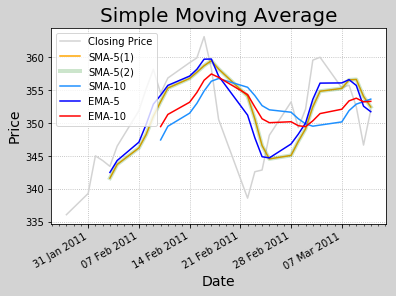

In [133]:
# smaema.py
import numpy as np
import datetime as dt
import matplotlib.pyplot as mp
import matplotlib.dates as md

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 6), unpack=True, dtype='M8[D], f8', 
            converters={1: dmy2ymd})

# SMA1普通方法
sma51 = np.zeros(closing_prices.size - 4)
for i in range(sma51.size):
    sma51[i] = closing_prices[i:i+5].mean()
# SMA2卷积方法
sma52 = np.convolve(closing_prices, np.ones(5)/5, 'valid')
sma10 = np.convolve(closing_prices, np.ones(10)/10, 'valid')

# EMA卷积方法
weights = np.exp(np.linspace(-1, 0, 5))
weights /= weights.sum()
ema5 = np.convolve(closing_prices, weights[::-1], 'valid')
weights = np.exp(np.linspace(-1, 0, 10))
weights /= weights.sum()
ema10 = np.convolve(closing_prices, weights[::-1], 'valid')




mp.figure('Simple Moving Average', facecolor='lightgray')
mp.title('Simple Moving Average', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Price', fontsize=14)
ax = mp.gca()
# 设置水平坐标每个星期一为主刻度
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
# 设置每一天为次刻度
ax.xaxis.set_minor_locator(md.DayLocator())
# 设置水平坐标主刻度标签格式
ax.xaxis.set_major_formatter(md.DateFormatter('%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

dates = dates.astype(md.datetime.datetime)

mp.plot(dates, closing_prices, c='lightgray', label='Closing Price')
mp.plot(dates[4:], sma51, c='orange', label='SMA-5(1)')
mp.plot(dates[4:], sma52, c='green', label='SMA-5(2)', alpha=0.2, linewidth=4)
mp.plot(dates[9:], sma10, c='dodgerblue', label='SMA-10')
mp.plot(dates[4:], ema5, c='blue', label='EMA-5')
mp.plot(dates[9:], ema10, c='red', label='EMA-10')


# 自动调整水平坐标轴的日期标签
mp.gcf().autofmt_xdate()
mp.legend()
mp.show()

### 10. 布林带
- 中轨：移动平均线
- 上轨：中轨+2x标准差
- 下轨：中轨-2x标准差

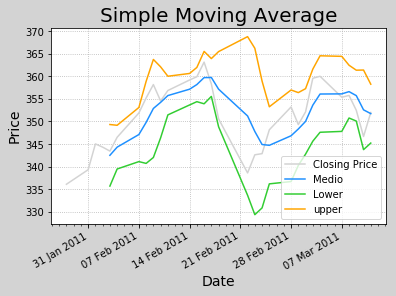

In [138]:
# ebb.py
import numpy as np
import datetime as dt
import matplotlib.pyplot as mp
import matplotlib.dates as md

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 6), unpack=True, dtype='M8[D], f8', 
            converters={1: dmy2ymd})


weights = np.exp(np.linspace(-1, 0, 5))
weights /= weights.sum()
medios = np.convolve(closing_prices, weights[::-1], 'valid')
stds = np.zeros(medios.size)
for i in range(stds.size):
    stds[i] = closing_prices[i:i+5].std()
stds *= 2
lowers = medios - stds
uppers = medios + stds




mp.figure('Simple Moving Average', facecolor='lightgray')
mp.title('Simple Moving Average', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Price', fontsize=14)
ax = mp.gca()
# 设置水平坐标每个星期一为主刻度
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
# 设置每一天为次刻度
ax.xaxis.set_minor_locator(md.DayLocator())
# 设置水平坐标主刻度标签格式
ax.xaxis.set_major_formatter(md.DateFormatter('%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

dates = dates.astype(md.datetime.datetime)

mp.plot(dates, closing_prices, c='lightgray', label='Closing Price')
mp.plot(dates[4:], medios, c='Dodgerblue', label='Medio')
mp.plot(dates[4:], lowers, c='limegreen', label='Lower')
mp.plot(dates[4:], uppers, c='orange', label='upper')


# 自动调整水平坐标轴的日期标签
mp.gcf().autofmt_xdate()
mp.legend()
mp.show()

### 11. 线性模型
    1    2   3    4      5
    60   65  70   75    <80>

1. 线性预测
        a b c d e f
        aA+bB+cC=d \
        bA+cB+dC=e  > -> 求A B C
        cA+dB+eC=f /
        dA+eB+fC -> ?

$\left( {\begin{array}{*{20}{c}}
a&b&c\\
b&c&d\\
c&d&e
\end{array}} \right)\left( {\begin{array}{*{20}{c}}
A\\
B\\
C
\end{array}} \right) = \left( {\begin{array}{*{20}{c}}
d\\
e\\
f
\end{array}} \right)$

- `np.linalg.lstsq(a, b)[0]`

/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/haoen110/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


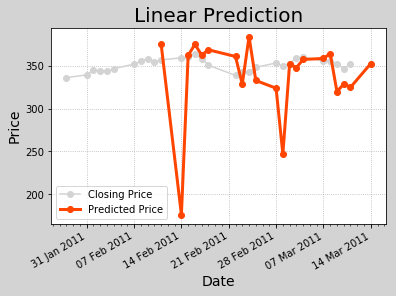

In [142]:
# ebb.py
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.dates as md

def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd

dates, closing_prices = np.loadtxt('../data/aapl.csv', delimiter=',', usecols=(1, 6), unpack=True, dtype='M8[D], f8', 
            converters={1: dmy2ymd})

N = 5
pred_prices = np.zeros(
    closing_prices.size - 2 * N + 1)
for i in range(pred_prices.size):
    a = np.zeros((N, N))
    for j in range(N):
        a[j, ] = closing_prices[i + j:i + j + N]
    b = closing_prices[i + N:i + N * 2]
    x = np.linalg.lstsq(a, b)[0]
    pred_prices[i] = b.dot(x)
mp.figure('Linear Prediction',
          facecolor='lightgray')
mp.title('Linear Prediction', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Price', fontsize=14)
ax = mp.gca()
# 设置水平坐标每个星期一为主刻度
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
# 设置水平坐标每一天为次刻度
ax.xaxis.set_minor_locator(md.DayLocator())
# 设置水平坐标主刻度标签格式
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
mp.plot(dates, closing_prices, 'o-', c='lightgray',
        label='Closing Price')
dates = np.append(dates,
                  dates[-1] + pd.tseries.offsets.BDay())
mp.plot(dates[2 * N:], pred_prices, 'o-',
        c='orangered', linewidth=3,
        label='Predicted Price')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()

2. 线性拟合
        kx + b = y
        kx1 + b = y1
        kx2 + b = y2
        ...
        kxn + b = yn
        / x1 1 \    / k \    / y1 \
        | x2 1 | X  | b | =  | y2 |
        | ...  |    \   /    | ...|
        \ xn 1/              \ yn /
            a        x           b
                      = np.linalg.lstsq(a, b)[0]
        y = kx + b
        kx1 + b = y1' - y1
        kx2 + b = y2' - y2
        ...
        kxn + b = yn' - yn
        [y1 - (kx1 + b)]^2 +
        [y2 - (kx2 + b)]^2 + ... +
        [yn - (kxn + b)]^2 = loss = f(k, b)
        k, b? -> loss ->min

/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this wa

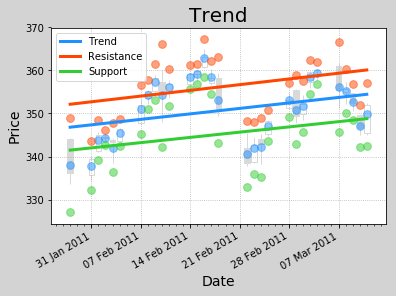

In [143]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, opening_prices, highest_prices, \
    lowest_prices, closing_prices = np.loadtxt(
        '../data/aapl.csv', delimiter=',',
        usecols=(1, 3, 4, 5, 6), unpack=True,
        dtype='M8[D], f8, f8, f8, f8',
        converters={1: dmy2ymd})
trend_points = (highest_prices + lowest_prices +
                closing_prices) / 3
spreads = highest_prices - lowest_prices
resistance_points = trend_points + spreads
support_points = trend_points - spreads
days = dates.astype(int)
a = np.column_stack((days, np.ones_like(days)))
x = np.linalg.lstsq(a, trend_points)[0]
trend_line = days * x[0] + x[1]
x = np.linalg.lstsq(a, resistance_points)[0]
resistance_line = days * x[0] + x[1]
x = np.linalg.lstsq(a, support_points)[0]
support_line = days * x[0] + x[1]
mp.figure('Trend', facecolor='lightgray')
mp.title('Trend', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Price', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
rise = closing_prices - opening_prices >= 0.01
fall = opening_prices - closing_prices >= 0.01
fc = np.zeros(dates.size, dtype='3f4')
ec = np.zeros(dates.size, dtype='3f4')
fc[rise], fc[fall] = (1, 1, 1), (0.85, 0.85, 0.85)
ec[rise], ec[fall] = (0.85, 0.85, 0.85), (0.85, 0.85, 0.85)
mp.bar(dates, highest_prices - lowest_prices, 0,
       lowest_prices, color=fc, edgecolor=ec)
mp.bar(dates, closing_prices - opening_prices, 0.8,
       opening_prices, color=fc, edgecolor=ec)
mp.scatter(dates, trend_points, c='dodgerblue',
           alpha=0.5, s=60, zorder=2)
mp.plot(dates, trend_line, c='dodgerblue',
        linewidth=3, label='Trend')
mp.scatter(dates, resistance_points, c='orangered',
           alpha=0.5, s=60, zorder=2)
mp.plot(dates, resistance_line, c='orangered',
        linewidth=3, label='Resistance')
mp.scatter(dates, support_points, c='limegreen',
           alpha=0.5, s=60, zorder=2)
mp.plot(dates, support_line, c='limegreen',
        linewidth=3, label='Support')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()


### 12. 裁剪、压缩和累乘
- `ndarray.clip(min=下限, max=上限)`
    - 将调用数组中小于和大于下限和上限的元素替换为下限和上限，返回裁剪后的数组，调用数组保持不变。
- `ndarray.compress(条件)`
    - 返回由调用数组中满足条件的元素组成的新数组。
- `ndarray.prod()`
    - 返回调用数组中所有元素的乘积——累乘。
- `ndarray.cumprod()`
    - 返回调用数组中所有元素执行累乘的过程数组。

In [2]:
# clip.py
import numpy as np

a = np.array([10, 20, 30, 40, 50])
print(a)
b = a.clip(min=15, max=45)
print(b)

c = a.compress((15 <= a) & (a <= 45))
print(c)

d = a.prod()
print(d)

e = a.cumprod()
print(e)


def jiecheng(n):
    return n if n == 1 else n * jiecheng(n - 1)
n = 5
print(jiecheng(n))

jc = 1
for i in range(2, n + 1):
    jc *= i
print(jc)

print(np.arange(2, n + 1).prod())


[10 20 30 40 50]
[15 20 30 40 45]
[20 30 40]
12000000
[      10      200     6000   240000 12000000]
120
120
120


### 13. 协方差、相关矩阵和相关系数
- 样本：
        A = [a1, a2, ..., an]
        B = [b1, b2, ..., bn]
- 平均值：
        ave_a = (a1+a2+...+an)/n
        ave_b = (b1+b2+...+bn)/m
- 离差：
        dev_a = [a1, a2, ..., an] - ave_a
        dev_b = [b1, b2, ..., bn] - ave_b
- 方差：
        var_a = ave(dev_a x dev_a)
        var_b = ave(dev_b x dev_b)
- 标准差：
        std_a = sqrt(var_a)
        std_b = sqrt(var_b)
- 协方差
        cov_ab = ave(dev_a x dev_b)
        cov_ba = ave(dev_b x dev_a)
- 相关系数
        cov_ab/(std_a x std_b)=cov_ba/(std_b x std_a)
        [-1, 1]
        -1<--------->0<--------->1
        反相关      不相关       正相关
        <-反相关性增强-  -正相关性增强->
- 相关矩阵
        /                                                 \
        | var_a/(std_a x std_a)    cov_ab/(std_a x std_b) |
        | cov_ba/(std_b x std_a)   var_b/(std_b x std_b)  |
        \                                                 /
        /                       \
        |       1       相关系数 |
        | 相关系数      1        |
        \                       /
        numpy.cov(a, b)->相关矩阵的分子矩阵
        numpy.corrcoef(a, b)->相关矩阵

[[1.         0.67841747]
 [0.67841747 1.        ]]
[[1.         0.67841747]
 [0.67841747 1.        ]]
[[1.         0.67841747]
 [0.67841747 1.        ]]


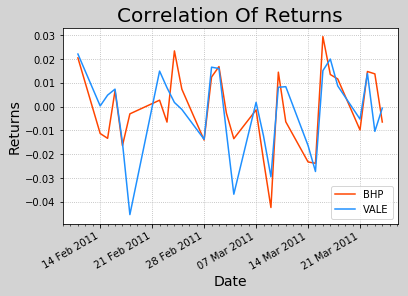

In [4]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, bhp_closing_prices = np.loadtxt(
    '../data/bhp.csv', delimiter=',',
    usecols=(1, 6), unpack=True,
    dtype='M8[D], f8', converters={1: dmy2ymd})
vale_closing_prices = np.loadtxt(
    '../data/vale.csv', delimiter=',',
    usecols=(6), unpack=True)
bhp_returns = np.diff(
    bhp_closing_prices) / bhp_closing_prices[:-1]
vale_returns = np.diff(
    vale_closing_prices) / vale_closing_prices[:-1]
ave_a = bhp_returns.mean()
dev_a = bhp_returns - ave_a
var_a = (dev_a * dev_a).sum() / (dev_a.size - 1)
std_a = np.sqrt(var_a)
ave_b = vale_returns.mean()
dev_b = vale_returns - ave_b
var_b = (dev_b * dev_b).sum() / (dev_b.size - 1)
std_b = np.sqrt(var_b)
cov_ab = (dev_a * dev_b).sum() / (dev_a.size - 1)
cov_ba = (dev_b * dev_a).sum() / (dev_b.size - 1)
corr = np.array([
    [var_a / (std_a * std_a), cov_ab / (std_a * std_b)],
    [cov_ba / (std_b * std_a), var_b / (std_b * std_b)]])
print(corr)
covs = np.cov(bhp_returns, vale_returns)
stds = np.array([
    [std_a * std_a, std_a * std_b],
    [std_b * std_a, std_b * std_b]])
corr = covs / stds
print(corr)
corr = np.corrcoef(bhp_returns, vale_returns)
print(corr)
mp.figure('Correlation Of Returns',
          facecolor='lightgray')
mp.title('Correlation Of Returns', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Returns', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
mp.plot(dates[:-1], bhp_returns, c='orangered',
        label='BHP')
mp.plot(dates[:-1], vale_returns, c='dodgerblue',
        label='VALE')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()

### 14. 多项式拟合
    y = p0x^n + p1x^n-1 + p2x^n-2 + ... + pn = f(x)
    y1' = f(x1) -> y1
    y2' = f(x2) -> y2
    ...
    yn' = f(xn) -> yn
    (y1-y1')^2 + (y2-y2')^2 + ... + (yn-yn')^2
    = loss (p0, ..., pn)
    p0, ..., pn = ? -> loss -> min
    X = [x1, x2, ..., xn] - 自变量
    Y = [y1, y2, ..., yn] - 实际函数值
    Y'= [y1',y2',...,yn'] - 拟合函数值
    P = [p0, p1, ..., pn] - 多项式函数中的系数
    Q = [q0, q1, ..., qn-1] - 多项式函数导函数的系数
    
    np.polyfit(X, Y, 最高次幂)->P
    np.polyval(P, X)->Y'
    np.polyder(P)->Q 
    
    y = 4x^3 + 3x^2 + 2x + 1, P=[4,3,2,1]
    dy/dx = 12x^2 + 6x + 2, Q=[12, 6, 2]
    4x^3 + 3x^2 + 2x + 1 = 0的根：np.roots(P)
    
    np.polysub(P1, P2)->两个多项式函数的差函数的系数
    
    y = 4x^3 + 3x^2 + 2x + 1, P1=[4,3,2,1]
    y = 5x^4 + x, P2=[5, 0, 0, 1, 0]
    y = -5x^4 + 4x^3 + 3x^2 + x + 1
    np.polysub(P1, P2)->[-5, 4, 4, 1, 1]

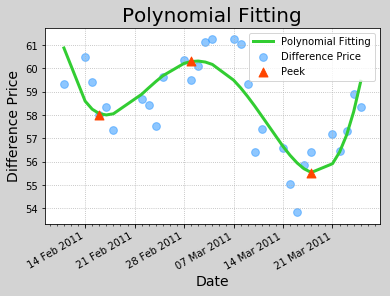

In [5]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, bhp_closing_prices = np.loadtxt(
    '../data/bhp.csv', delimiter=',',
    usecols=(1, 6), unpack=True,
    dtype='M8[D], f8', converters={1: dmy2ymd})
vale_closing_prices = np.loadtxt(
    '../data/vale.csv', delimiter=',',
    usecols=(6), unpack=True)
diff_closing_prices = bhp_closing_prices - \
    vale_closing_prices
days = dates.astype(int)
p = np.polyfit(days, diff_closing_prices, 4)
poly_closing_prices = np.polyval(p, days)
q = np.polyder(p)
roots_x = np.roots(q)
roots_y = np.polyval(p, roots_x)
mp.figure('Polynomial Fitting', facecolor='lightgray')
mp.title('Polynomial Fitting', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Difference Price', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
mp.plot(dates, poly_closing_prices, c='limegreen',
        linewidth=3, label='Polynomial Fitting')
mp.scatter(dates, diff_closing_prices, c='dodgerblue',
           alpha=0.5, s=60, label='Difference Price')
roots_x = roots_x.astype(int).astype(
    'M8[D]').astype(md.datetime.datetime)
mp.scatter(roots_x, roots_y, marker='^', s=80,
           c='orangered', label='Peek', zorder=4)
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()


### 15. 符号数组
- `np.sign(源数组)->符号数组`
        + -> 1
        - -> -1
        0 -> 0
- `np.piecewise(源数组, 条件序列, 取值序列)`->目标数组
    - 针对源数组中的每一个元素，检测其是否符合条件序列中的每一个条件，符合哪个条件就用取值系列中与之对应的值，表示该元素，放到目标数组中返回。
    - 条件序列: [a < 0, a == 0, a > 0]
    - 取值序列: [-1, 0, 1]

In [8]:
# sign.py
from __future__ import unicode_literals
import numpy as np

a = np.array([70, 80, 60, 30, 40])
print(a)

b = a - 60
print(b)

c = np.sign(b)
print(c)

d = np.piecewise(a, [a < 60, a == 60, a > 60], [-1, 0, 1])
print(d)

[70 80 60 30 40]
[ 10  20   0 -30 -20]
[ 1  1  0 -1 -1]
[ 1  1  0 -1 -1]


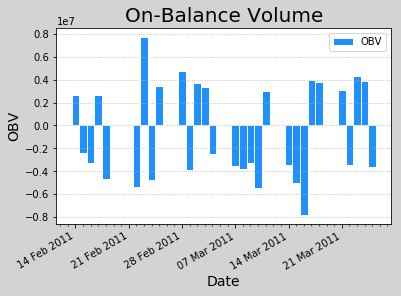

In [10]:
# obv.py
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, closing_prices, volumes = np.loadtxt(
    '../data/bhp.csv', delimiter=',',
    usecols=(1, 6, 7), unpack=True,
    dtype='M8[D], f8, f8', converters={1: dmy2ymd})
diff_closing_prices = np.diff(closing_prices)
#sign_closing_prices = np.sign(diff_closing_prices)
sign_closing_prices = np.piecewise(
    diff_closing_prices, [
        diff_closing_prices < 0,
        diff_closing_prices == 0,
        diff_closing_prices > 0], [-1, 0, 1])
obvs = volumes[1:] * sign_closing_prices
mp.figure('On-Balance Volume', facecolor='lightgray')
mp.title('On-Balance Volume', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('OBV', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(axis='y', linestyle=':')
dates = dates[1:].astype(md.datetime.datetime)
mp.bar(dates, obvs, 1.0, color='dodgerblue',
       edgecolor='white', label='OBV')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()

### 16. 矢量化

    def 标量函数(标量参数1, 标量参数2, ...):
        ...
        return 标量返回值1, 标量返回值2, ...
    矢量参数1
    矢量参数2
    ...
    
    numpy.vectorize(标量函数)->矢量函数
    矢量函数(矢量参数1, 矢量参数2, ...)
        ->矢量返回值1, 矢量返回值2

In [11]:
# vec.py
import numpy as np

def foo(x, y):
    return x + y, x - y, x * y


x, y = 1, 4
print(foo(x, y))

X, Y = np.array([1, 2, 3]), np.array([4, 5, 6])

bar = np.vectorize(foo)
print(bar(X, Y))

print(np.vectorize(foo)(X, Y))


(5, -3, 4)
(array([5, 7, 9]), array([-3, -3, -3]), array([ 4, 10, 18]))
(array([5, 7, 9]), array([-3, -3, -3]), array([ 4, 10, 18]))


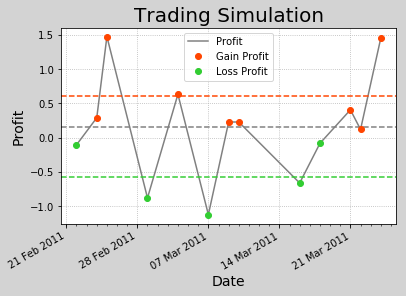

In [13]:
# sim.py
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, opening_prices, highest_prices, \
    lowest_prices, closing_prices = np.loadtxt(
        '../data/bhp.csv', delimiter=',',
        usecols=(1, 3, 4, 5, 6), unpack=True,
        dtype='M8[D], f8, f8, f8, f8',
        converters={1: dmy2ymd})


def profit(opening_price, highest_price,
           lowest_price, closing_price):
    buying_price = opening_price * 0.99
    if lowest_price <= buying_price <= highest_price:
        return (closing_price - buying_price) * \
            100 / buying_price
    return np.nan  # 无效值


profits = np.vectorize(profit)(
    opening_prices, highest_prices, lowest_prices,
    closing_prices)
nan = np.isnan(profits)
dates, profits = dates[~nan], profits[~nan]
gain_dates, gain_profits = dates[profits > 0], \
    profits[profits > 0]
loss_dates, loss_profits = dates[profits < 0], \
    profits[profits < 0]
mp.figure('Trading Simulation', facecolor='lightgray')
mp.title('Trading Simulation', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Profit', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
if dates.size > 0:
    dates = dates.astype(md.datetime.datetime)
    mp.plot(dates, profits, c='gray',
            label='Profit')
    mp.axhline(y=profits.mean(), linestyle='--',
               color='gray')
if gain_dates.size > 0:
    gain_dates = gain_dates.astype(md.datetime.datetime)
    mp.plot(gain_dates, gain_profits, 'o',
            c='orangered', label='Gain Profit')
    mp.axhline(y=gain_profits.mean(), linestyle='--',
               color='orangered')
if loss_dates.size > 0:
    loss_dates = loss_dates.astype(md.datetime.datetime)
    mp.plot(loss_dates, loss_profits, 'o',
            c='limegreen', label='Loss Profit')
    mp.axhline(y=loss_profits.mean(), linestyle='--',
               color='limegreen')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()

### 17. 数据平滑
    降噪 拟合   识别特征
    卷积 多项式  数学方法
    y1 = f(x1)
    y1 = g(x1)
    f(x1) = g(x1)
    f(x1) - g(x1) = 0
    f(x) - g(x) = 0

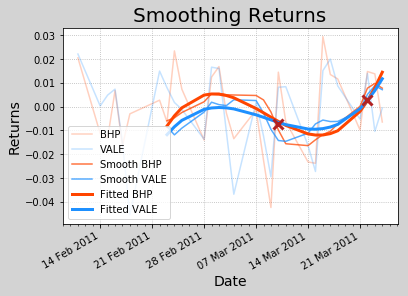

In [14]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md


def dmy2ymd(dmy):
    dmy = str(dmy, encoding='utf-8')
    date = dt.datetime.strptime(
        dmy, '%d-%m-%Y').date()
    ymd = date.strftime('%Y-%m-%d')
    return ymd


dates, bhp_closing_prices = np.loadtxt(
    '../data/bhp.csv', delimiter=',',
    usecols=(1, 6), unpack=True,
    dtype='M8[D], f8', converters={1: dmy2ymd})
vale_closing_prices = np.loadtxt(
    '../data/vale.csv', delimiter=',',
    usecols=(6), unpack=True)
bhp_returns = np.diff(
    bhp_closing_prices) / bhp_closing_prices[:-1]
vale_returns = np.diff(
    vale_closing_prices) / vale_closing_prices[:-1]
N = 8
weights = np.hanning(N)
weights /= weights.sum()
bhp_smooth_returns = np.convolve(
    bhp_returns, weights, 'valid')
vale_smooth_returns = np.convolve(
    vale_returns, weights, 'valid')
days = dates[N - 1:-1].astype(int)
degree = 3
bhp_p = np.polyfit(days, bhp_smooth_returns, degree)
bhp_fitted_returns = np.polyval(bhp_p, days)
vale_p = np.polyfit(days, vale_smooth_returns, degree)
vale_fitted_returns = np.polyval(vale_p, days)
sub_p = np.polysub(bhp_p, vale_p)
roots_x = np.roots(sub_p)
roots_x = roots_x.compress(
    (days[0] <= roots_x) & (roots_x <= days[-1]))
roots_y = np.polyval(bhp_p, roots_x)
mp.figure('Smoothing Returns', facecolor='lightgray')
mp.title('Smoothing Returns', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('Returns', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(
    byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())
ax.xaxis.set_major_formatter(md.DateFormatter(
    '%d %b %Y'))
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
dates = dates.astype(md.datetime.datetime)
mp.plot(dates[:-1], bhp_returns, c='orangered',
        alpha=0.25, label='BHP')
mp.plot(dates[:-1], vale_returns, c='dodgerblue',
        alpha=0.25, label='VALE')
mp.plot(dates[N - 1:-1], bhp_smooth_returns,
        c='orangered', alpha=0.75,
        label='Smooth BHP')
mp.plot(dates[N - 1:-1], vale_smooth_returns,
        c='dodgerblue', alpha=0.75,
        label='Smooth VALE')
mp.plot(dates[N - 1:-1], bhp_fitted_returns,
        c='orangered', linewidth=3,
        label='Fitted BHP')
mp.plot(dates[N - 1:-1], vale_fitted_returns,
        c='dodgerblue', linewidth=3,
        label='Fitted VALE')
roots_x = roots_x.astype(int).astype(
    'M8[D]').astype(md.datetime.datetime)
mp.scatter(roots_x, roots_y, s=100, marker='x',
           c='firebrick', lw=3, zorder=3)
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()
